### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sh_cars=pd.read_csv("datasets/vehicles_us.csv")
sh_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


We have a data set about the cars market. I would call it  sh_cars data frame. We see there the important information about cars such as models, model years, price and so on. The main purpose of this to research the main factors that influence the price and find the correlation between the columns.

### Step 2. Data preprocessing

In [2]:
sh_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We see that all data formats are correct.

In [3]:

sh_cars.isnull().sum()*100/len(sh_cars)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

We see that the mean of missing value is significant and deleting them could cause to loss of a lot of significant information. Especially, the value of the ''is_4wd'' column is missing if we delete them, it means will delete half of the data It is better to look at the data type the decide whether they can be filled, and which method is used to fill them. To look at the data type,  unique ()  method can be used and we can also see whether there is any abnormal value.

In [4]:
sh_cars.duplicated().sum()

0

We have to also check duplicated values because we do not want to count a value several times. Lucky, We do have any duplicated value but we have to also check the there is any word with a capital letter.Unique() can be used also for this purpose.

In [5]:

for col in sh_cars:
    print(                           "Unique value of for",  col)
    print(sh_cars[col].sort_values().unique())
    print('________________________________________________________________________________')
    

Unique value of for price
[     1      3      5 ... 189000 300000 375000]
________________________________________________________________________________
Unique value of for model_year
[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]
________________________________________________________________________________
Unique value of for model
['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrol


#Updated
We see that there what kind of data we have in each column ,  and which data type needs to convet into correct data form. But I will columsn into correct format after deleting or filling missing value . I see that 4_wd, odometer, cylinders   columns shoud be converted into correct format . 4_wd -bool, odometer and  cylinders - int . 

In [6]:
sh_cars['model_year']=pd.to_datetime(sh_cars['model_year'], format='%Y')
sh_cars['date_posted']=pd.to_datetime(sh_cars['date_posted'], format='%Y-%m-%dT%H:%M:%S').dt.normalize()

We have to change these columns data type to make sure that we can do some operations on them.

### Step 3. Make calculations and add them to the table

In [7]:
#Updated
sh_cars['date_posted'] = pd.to_datetime(sh_cars['date_posted']) 
sh_cars['day']=sh_cars['date_posted'].dt.day_name()
sh_cars['month']=sh_cars['date_posted'].dt.month_name(locale = 'English') 
sh_cars['year']=sh_cars['date_posted'].dt.year

I added 3 more column day month and year of date posted .

In [8]:
sh_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year
0,9400,2011-01-01,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Saturday,June,2018
1,25500,NaT,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Friday,October,2018
2,5500,2013-01-01,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,Thursday,February,2019
3,1500,2003-01-01,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,Friday,March,2019
4,14900,2017-01-01,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,Tuesday,April,2019


I used this in order to more accurately fill the missing value for example if the price is missing and this car belongs to the low mileage category, I will take an overage price from low mileage and fill the missing value with that. But I can also delete that. I prefer to delete and not make the task more complicated.

In [10]:
sh_cars.loc[sh_cars['price'] < 200, 'price'] =0
sh_cars['price'].replace(0, np.NaN, inplace=True)

In [11]:
#updated .I used the np.ceil 

In [12]:
sh_cars['price'] = np.ceil(sh_cars['price'].fillna(sh_cars.groupby(['condition', 'model' ])['price'].transform('mean')))
sh_cars['price'] = np.ceil(sh_cars['price'].fillna(sh_cars.groupby('condition')['price'].transform('mean')))

In [13]:
sh_cars['odometer'] =np.ceil( sh_cars['odometer'].fillna(sh_cars.groupby(['condition', 'model'])['odometer'].transform('mean')))
sh_cars['odometer'] = np.ceil(sh_cars['odometer'].fillna(sh_cars.groupby('condition')['odometer'].transform('mean')))

In [14]:
sh_cars['odometer'] = np.ceil(sh_cars['odometer'].fillna(sh_cars.groupby(['condition', 'model'])['odometer'].transform('mean')))
sh_cars['odometer'] =np.ceil( sh_cars['odometer'].fillna(sh_cars.groupby('condition')['odometer'].transform('mean')))

In [15]:
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan
s = sh_cars.groupby('model')['cylinders'].transform(f)
sh_cars['cylinders']=sh_cars['cylinders'].fillna(s)

In [16]:
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan
s = sh_cars.groupby('model')['model_year'].transform(f)
sh_cars['model_year']=sh_cars['model_year'].fillna(s)

In [17]:
#updated
sh_cars['paint_color']=sh_cars['paint_color'].fillna('unknow')

In [18]:
#updated
sh_cars['paint_color'].unique()

array(['unknow', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [19]:
#updated
sh_cars['is_4wd'] = sh_cars['is_4wd'].astype(str)
sh_cars.loc[sh_cars['is_4wd'] == 'nan', 'is_4wd'] ='0'
sh_cars['is_4wd'] = sh_cars['is_4wd'].astype(float)
sh_cars['is_4wd']=sh_cars['is_4wd'].apply(lambda x: bool(x))

In [20]:

sh_cars['cylinders'] = sh_cars['cylinders'].astype('Int64')

I thought that this is prober why to fill the missing value because I grouped the data and tried to find similar data and with that to fill the missing values. Therefore I created an extra column 'odometer' because odometer measure is important in price. When we want to fill the price missing value, I think we have to also this take into contraction. I filled the missing values in Step 3 because of again creating extra columns or grouping the data and then filling the missing values.

In [22]:
sh_cars['vehicel_age'] = sh_cars['date_posted'].dt.year-sh_cars['model_year'].dt.year

In [23]:

sh_cars['overage_mile']=np.ceil(sh_cars['odometer']/sh_cars['vehicel_age'])

In [24]:
#updated
def car_condidtion(condition):
    """
    The condition of cars is grouped according to the condition from new to salvage in a numeric form from 5 to 0 accordingly :
    —'0 ' if condition is salvage  
    —'1' if condition is fair   
    —'2 ' if condition is 	good   
    -'3 ' if condition is excellent   
    -'4 ' if condition is 	like new 
    -'5 ' if condition is  new
     """

    if condition == 'good':
        return  2
    if condition == 'new':
        return  5
    if condition == 'excellent':
        return 3
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0
    if condition == 'like new':
        return 4
 
sh_cars['condition'] = sh_cars['condition'].apply(car_condidtion)

#update     
I changed the data rating with the number rating. 5 is the best condition and 0 is the worst condition. I think it is better now also change the data type into int. I do not know it useful for the task but I would like to do it.

In [25]:
sh_cars['condition'] = sh_cars['condition'].astype('Int64')

The conclusion based on my results so far is that, I filled the missing values with the different methods so new we a better data to analyze then also change the data type of some data and the last thing is to give a new rating car according to their condition.

### Step 4. Carry out exploratory data analysis

Text(0.5, 0, 'Price of cars ')

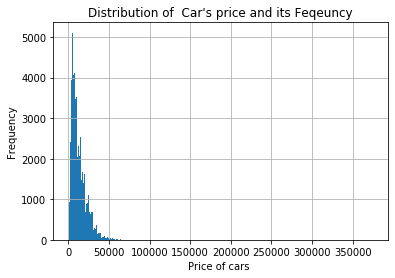

In [26]:

fig=sh_cars['price'].plot.hist(bins=300, grid=True) 
fig.set_title("Distribution of  Car's price and its Feqeuncy")
fig.set_xlabel('Price of cars ')

Text(0.5, 0, 'Age of cars')

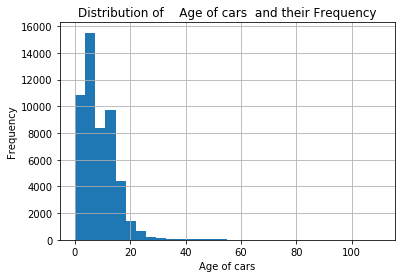

In [28]:

fig1=sh_cars['vehicel_age'].plot.hist(bins=30, grid=True) 
fig1.set_title("Distribution of    Age of cars  and their Frequency")
fig1.set_xlabel('Age of cars')

Text(0.5, 0, 'mileage of cars')

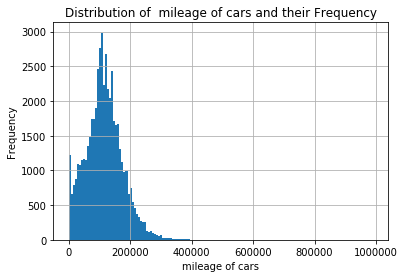

In [29]:
fig2=sh_cars['odometer'].plot.hist(bins=150, grid=True) 
fig2.set_title("Distribution of  mileage of cars and their Frequency")
fig2.set_xlabel('mileage of cars')

Text(0.5, 0, 'Number of Clinder')

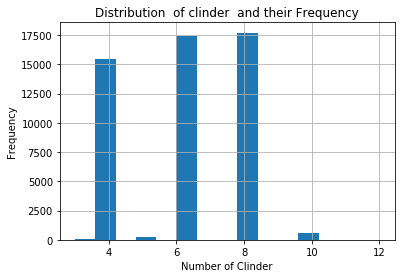

In [30]:
fig3=sh_cars['cylinders'].plot.hist(bins=15, grid=True) 
fig3.set_title("Distribution  of clinder  and their Frequency")
fig3.set_xlabel('Number of Clinder')

 #updated      
 We see that we cannot read the graph good special fig and fig 2 because of a large number but we can use the quantile method to define the upper limit and then make graphs again.But before deleting ddeciribe the distribution . I use plot for this purpose 
 


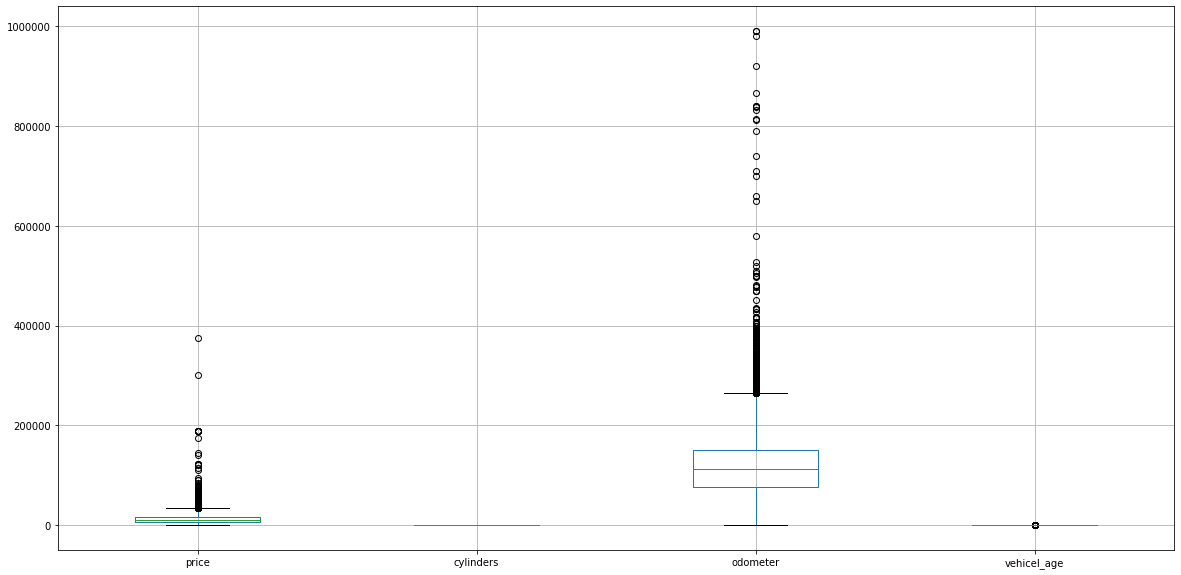

In [31]:
boxplot = sh_cars.boxplot(column=['price', 'cylinders', 'odometer', 'vehicel_age'], figsize=(20,10))

In [32]:
Q1 = sh_cars['cylinders'].quantile(0.25)
Q3 = sh_cars['cylinders'].quantile(0.75)
print("First quartile of car cylinders is ", Q1)
print("First quartile of car cylinders is ", Q3)


First quartile of car cylinders is  4.0
First quartile of car cylinders is  8.0


In [33]:
Q1 = sh_cars['price'].quantile(0.25)
Q3 = sh_cars['price'].quantile(0.75)
print("First quartile of car price is ", Q1)
print("First quartile of car price is ", Q3)

First quartile of car price is  5493.0
First quartile of car price is  16950.0


In [34]:
Q1 = sh_cars['odometer'].quantile(0.25)
Q3 = sh_cars['odometer'].quantile(0.75)
print("First quartile of car odometer is ", Q1)
print("First quartile of car odometer is ", Q3)

First quartile of car odometer is  75702.0
First quartile of car odometer is  151000.0


In [35]:
Q1 = sh_cars['vehicel_age'].quantile(0.25)
Q3 = sh_cars['vehicel_age'].quantile(0.75)
print("First quartile of car vehicel_age is ", Q1)
print("First quartile of car vehicel_age is ", Q3)

First quartile of car vehicel_age is  4.0
First quartile of car vehicel_age is  12.0


#updated  
We found Q1 and Q2 values and we know the value between these values re important for the analysis because the outlier shows the standard deviation and the reasons for outliers could be some misfiled values or some exceptions.

In [36]:
DataFrame = sh_cars[(sh_cars['price']<sh_cars['price'].quantile(0.75)) & (sh_cars['cylinders']<sh_cars['cylinders'].quantile(0.75))  & (sh_cars['odometer']<sh_cars['odometer'].quantile(0.75)) & (sh_cars['vehicel_age']<sh_cars['vehicel_age'].quantile(0.75))]
                  

Text(0.5, 0, 'Price of cars in Euro ')

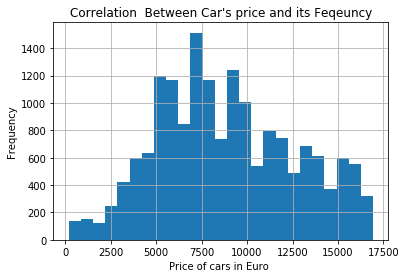

In [37]:
fig_new=DataFrame['price'].plot.hist(bins=25, grid=True) 
fig_new.set_title("Correlation  Between Car's price and its Feqeuncy")
fig_new.set_xlabel('Price of cars in Euro ')

We see that price of cars most cars are between 5000 and 7500, till 2500 eur there are not so many cars just under 200.

Text(0.5, 0, 'Age of cars')

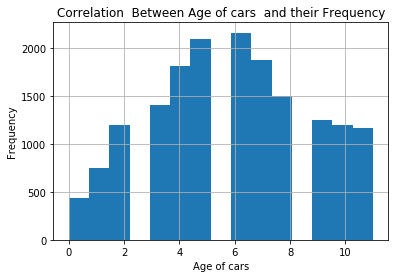

In [38]:
fig1_new=DataFrame['vehicel_age'].plot.hist(bins=15, grid=True) 
fig1_new.set_title("Correlation  Between Age of cars  and their Frequency")
fig1_new.set_xlabel('Age of cars')

We see that most cars are between 6 and 8 years old. Its number is a little more than 2000

Text(0.5, 0, 'mileage of cars')

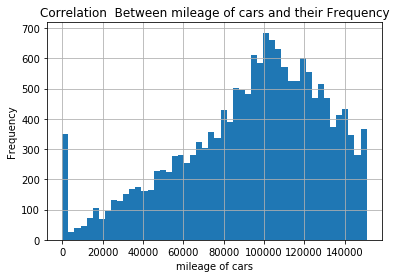

In [39]:
fig2_new=DataFrame['odometer'].plot.hist(bins=50, grid=True) 
fig2_new.set_title("Correlation  Between mileage of cars and their Frequency")
fig2_new.set_xlabel('mileage of cars')

We see that most cars were driven between 75000 and 1000. And about 100 cars are used a lot, about 350 cars are new.

If we compare new grapes with old ones, it is obvious that with news one can come to a conclusion about relations between variables, because of an outlier number it is very hard to do it with old graphs

In [40]:
pivot_days=DataFrame.pivot_table(index='model', values='days_listed', aggfunc=('mean', 'median')).round(2)

In [74]:
#updated

#pivot_days.hist(bins=15, grid=True)
pivot_days.sort_values('mean', ascending= True)

,mean,median
model,,
ford f250 super duty,9.50,9.5
ford econoline,10.50,10.5
chevrolet suburban,23.00,23.0
ford f-250,27.00,27.0
ford f150 supercrew cab xlt,30.00,30.0
...,...,...
ford taurus,44.17,33.5
kia sorento,44.76,34.0
dodge charger,45.63,38.0


In [71]:
DataFrame.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicel_age,overage_mile
0,9400.0,2011-01-01,bmw x5,2,6,gas,145000.0,automatic,SUV,unknow,True,2018-06-23,19,Saturday,June,2018,7,20715.0
2,5500.0,2013-01-01,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18334.0
4,14900.0,2017-01-01,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0
5,14990.0,2014-01-01,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14489.0
6,12990.0,2015-01-01,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015-01-01,honda accord,3,4,gas,112815.0,automatic,coupe,unknow,False,2018-11-24,89,Saturday,November,2018,3,37605.0
51520,9249.0,2013-01-01,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,Wednesday,October,2018,5,17628.0
51522,3950.0,2009-01-01,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,Thursday,November,2018,9,14223.0
51523,7455.0,2013-01-01,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,Monday,July,2018,5,27915.0


The average car age is about 40 and most of the age of the car are about 30 age.

In [42]:
DataFrame[DataFrame['days_listed']==0 ]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicel_age,overage_mile
7036,5900.0,2007-01-01,jeep grand cherokee laredo,3,6,gas,127780.0,automatic,SUV,grey,True,2018-07-21,0,Saturday,July,2018,11,11617.0
9607,4999.0,2012-01-01,nissan sentra,3,4,gas,125000.0,automatic,sedan,silver,False,2019-03-26,0,Tuesday,March,2019,7,17858.0
16046,8200.0,2014-01-01,honda accord,3,4,gas,121000.0,automatic,sedan,silver,False,2018-05-31,0,Thursday,May,2018,4,30250.0
16138,3650.0,2013-01-01,kia soul,2,4,gas,101370.0,manual,hatchback,grey,False,2019-01-27,0,Sunday,January,2019,6,16895.0
16210,13995.0,2008-01-01,toyota 4runner,3,6,gas,136058.0,automatic,SUV,unknow,True,2018-07-17,0,Tuesday,July,2018,10,13606.0
17339,7800.0,2009-01-01,gmc sierra,3,6,gas,142000.0,automatic,truck,red,False,2018-07-05,0,Thursday,July,2018,9,15778.0
20817,11886.0,2017-01-01,ford fusion se,3,4,gas,72000.0,automatic,sedan,unknow,False,2018-10-16,0,Tuesday,October,2018,1,72000.0
21840,2950.0,2013-01-01,chevrolet malibu,2,4,gas,140000.0,automatic,sedan,unknow,False,2018-08-27,0,Monday,August,2018,5,28000.0
23195,7995.0,2013-01-01,toyota corolla,3,4,gas,102466.0,automatic,sedan,silver,False,2019-03-09,0,Saturday,March,2019,6,17078.0
29377,9450.0,2014-01-01,kia sorento,3,4,gas,91776.0,automatic,SUV,silver,True,2018-08-27,0,Monday,August,2018,4,22944.0


I used this method to find out when ads were removed quickly but I do not understand that what is abnormally long time because a car add can stay in a web site 200 days Maybe more than 1 year. 

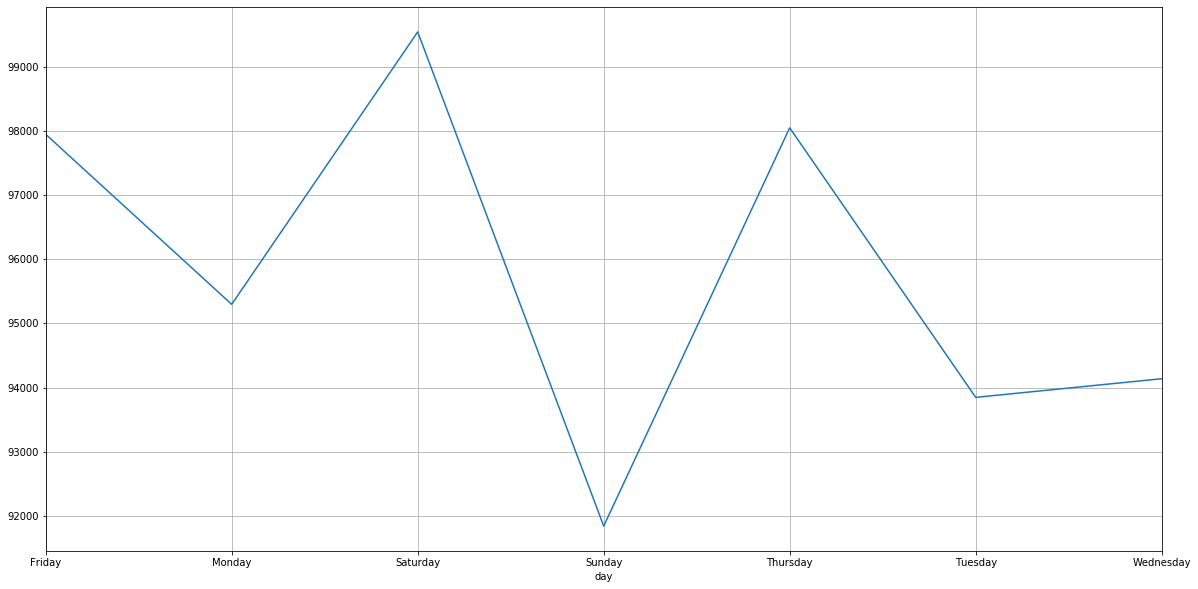

In [49]:
number_days=DataFrame.groupby('day')['days_listed'].sum()
number_days.plot(  grid=True, figsize=(20,10)) 
 

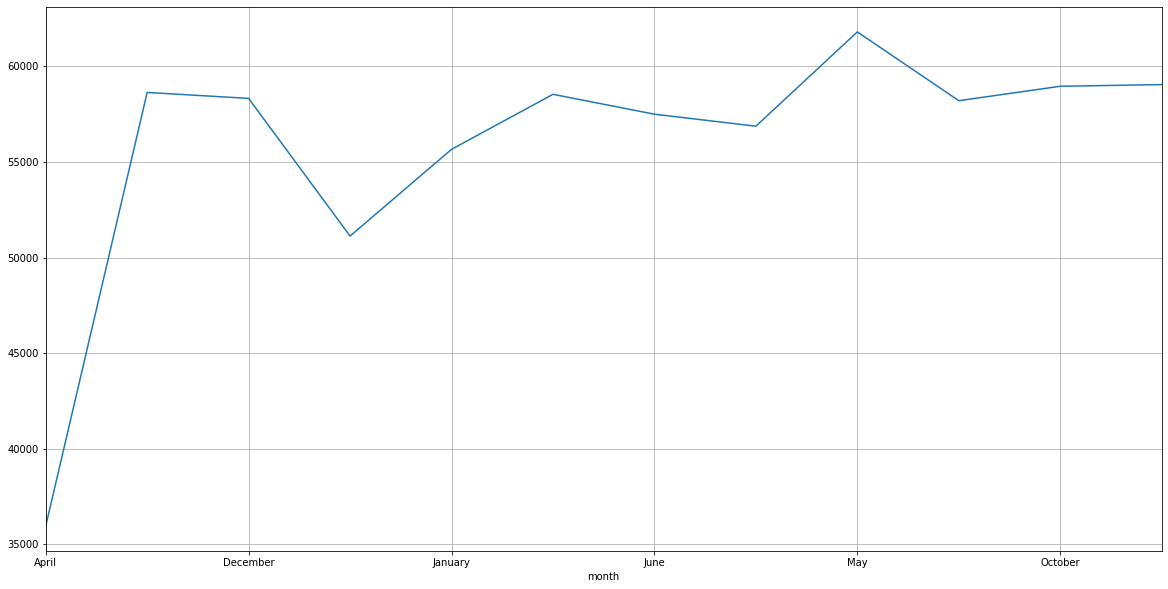

In [50]:
number_month=DataFrame.groupby('month')['days_listed'].sum()
number_month.plot(  grid=True, figsize=(20,10)) 

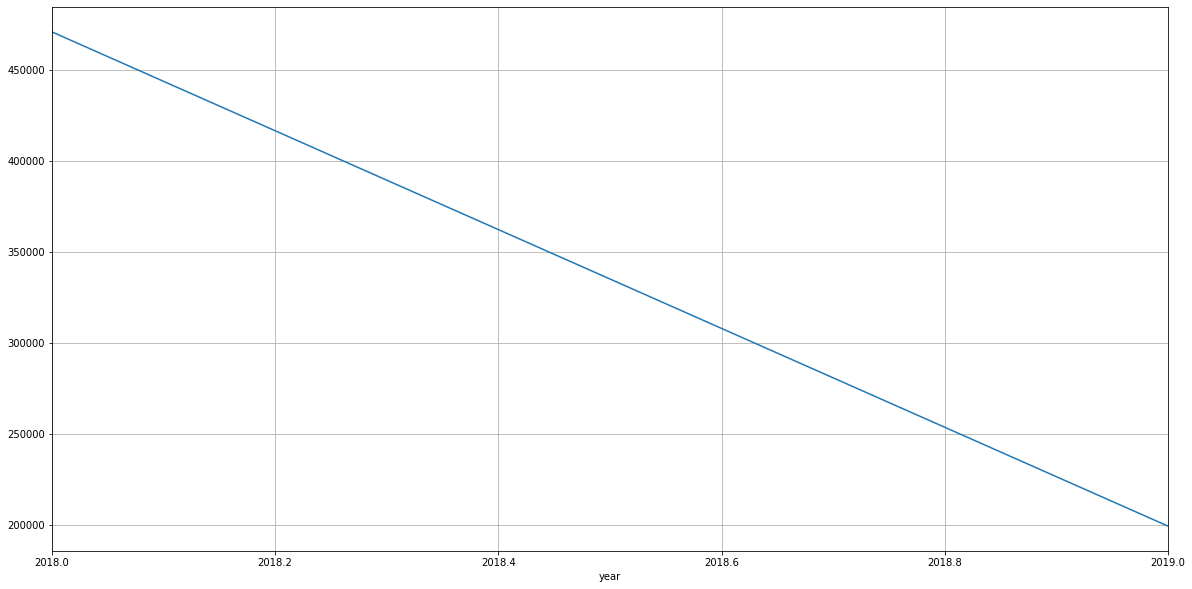

In [51]:
number_year=DataFrame.groupby('year')['days_listed'].sum()
number_year.plot(  grid=True, figsize=(20,10)) 

 I  tried how to show the number days that were displayed and on which day of the week, month, and years. The important thing is here is that most cars are sold in 2019  but a number of sell according to month overall the same exception in April.

In [52]:
DataFrame.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicel_age,overage_mile
0,9400.0,2011-01-01,bmw x5,2,6,gas,145000.0,automatic,SUV,unknow,True,2018-06-23,19,Saturday,June,2018,7,20715.0
2,5500.0,2013-01-01,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18334.0
4,14900.0,2017-01-01,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0
5,14990.0,2014-01-01,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14489.0
6,12990.0,2015-01-01,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.0


In [53]:

price_mean=DataFrame.groupby('type')['price']. mean()

In [54]:

price_and_adsnumber = DataFrame.pivot_table(index='type', values='date_posted', aggfunc='count')
price_and_adsnumber=price_and_adsnumber.merge(price_mean, on='type').sort_values('date_posted', ascending=False)

In [79]:
price_and_adsnumber


,date_posted,price
type,,
sedan,8120,7943.009483
SUV,4707,9959.782664
wagon,826,9339.876513
hatchback,679,7553.524300
truck,616,11341.766234
mini-van,570,8785.292982
coupe,555,9533.472072
pickup,355,10467.033803
van,231,9536.307359


DataFrame.head()

In [56]:

final_data=DataFrame.loc[DataFrame['type'].isin(['sedan','SUV'])]

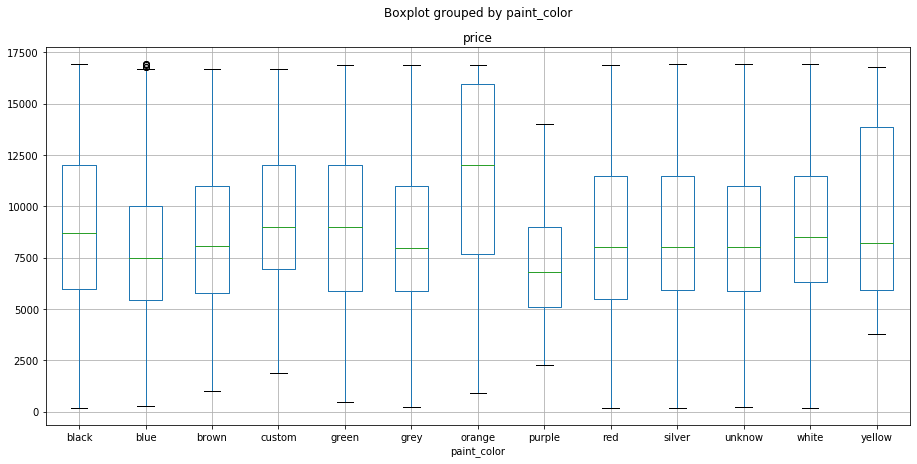

In [57]:
final_data.boxplot(column=['price'], by='paint_color', return_type='axes', figsize=(15, 7))
plt.show()

The overage price of most  cars for the colour are around 7500 . The Orange coloured cars is more expensive that others . The Q1 and Q2 value are generally between 5000 and 12500  

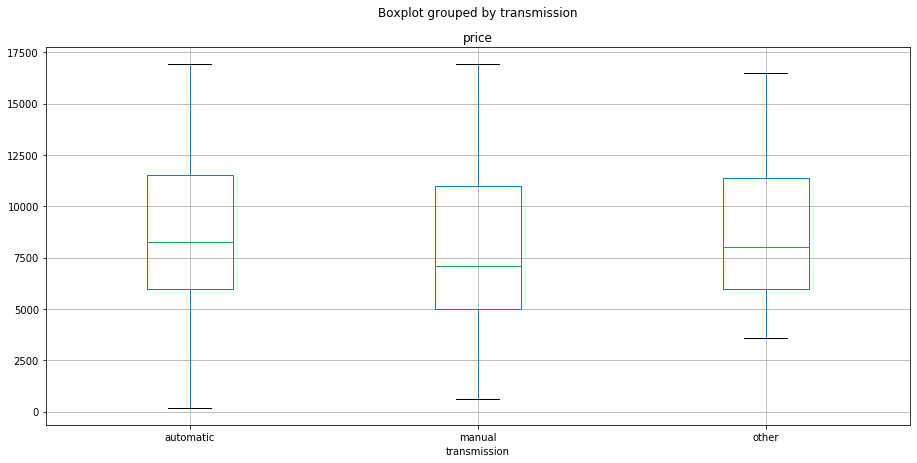

In [58]:
final_data.boxplot(column=['price'], by='transmission', return_type='axes', figsize=(15, 7))
plt.show()

Overall automatic cars is the expensive ones , and the overage price for other thpe of cars are under 7500. 


#updated.
I used the scatter method to find each column corr with price, the I used scatter_matrix to find the price dependability on each factor. 

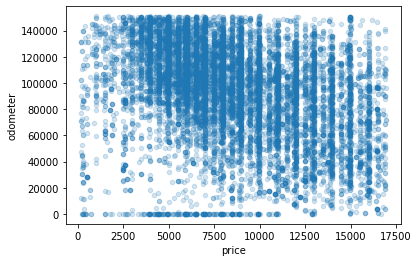

In [68]:
final_data.plot(x='price', y='odometer', kind='scatter', alpha=0.2)
plt.show()

We see that the expensive cars are mostly which one is not used a lot . 

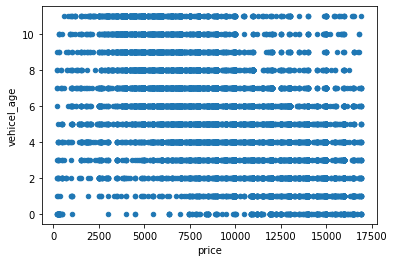

In [60]:
final_data.plot(x='price', y='vehicel_age', kind='scatter')
plt.show()

We see that  the expensive cars are mainly  which is new and have under 5 years age. 

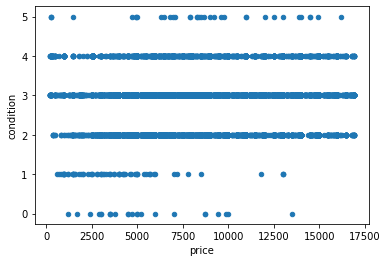

In [69]:
final_data.plot(x='price', y='condition', kind='scatter')
plt.show()

Most cars have good, excellent and like-new condition and they price difference between about 1000 $ and 16000 $. You can find cars in this condition almost at every price.

In [62]:
final_data_2=final_data.pivot_table(index='price', values=("odometer",'condition', 'vehicel_age' ))


In [63]:
final_data_2

,condition,odometer,vehicel_age
price,,,
200.0,3.333333,59633.333333,1.333333
206.0,4.000000,62793.333333,0.000000
211.0,3.000000,130982.000000,6.666667
215.0,3.000000,102555.000000,2.000000
222.0,3.000000,119949.333333,8.333333
...,...,...,...
16899.0,3.000000,31061.000000,2.000000
16900.0,3.000000,62415.517241,3.172414
16905.0,2.000000,114754.750000,5.000000


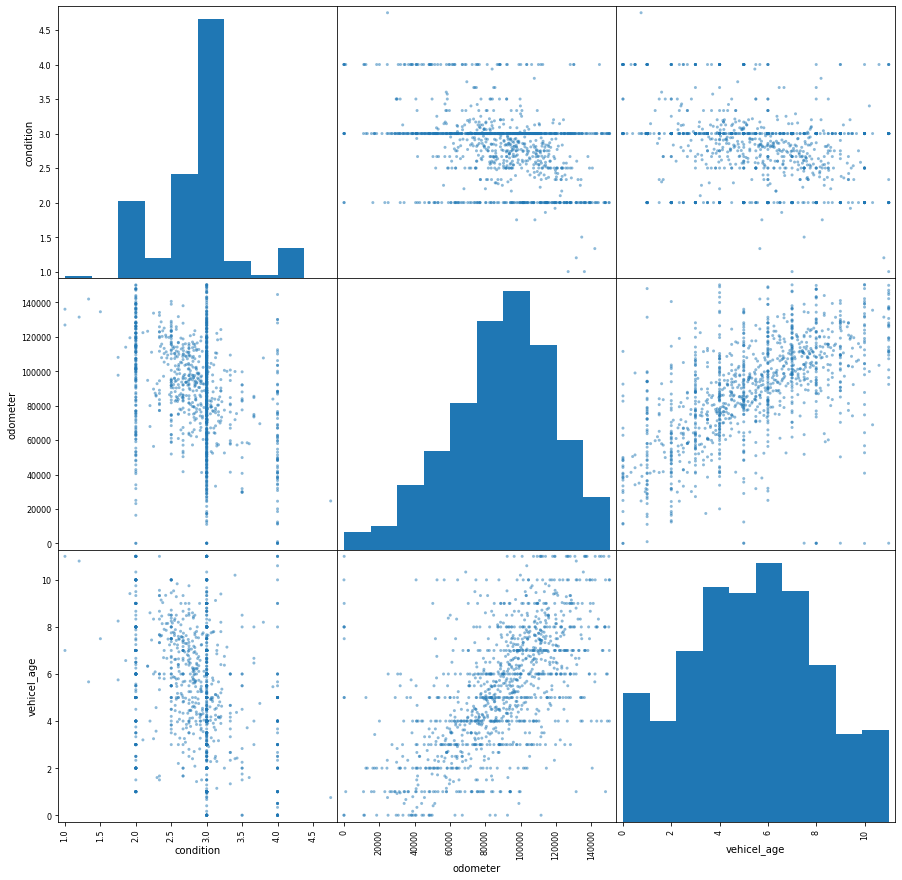

In [70]:
pd.plotting.scatter_matrix(final_data_2, figsize=(15, 15))
plt.show()

I used also the scatter_matrix method to find the price distribution according to the correlation of 3 factors. such as condition, odometer, and vehicle age. For example, the condition and vehicel_age cell, the condition is the main determinant of the car price,  also age and odometer cell, the odometer is the main determinant of the car price.

In [67]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = final_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,condition,cylinders,odometer,is_4wd,days_listed,year,vehicel_age,overage_mile
price,1,0.112842,0.0803471,-0.333347,0.224403,0.00353272,0.0286397,-0.461659,0.225448
condition,0.112842,1,-0.0593273,-0.238817,-0.0155776,-0.0128354,0.0243266,-0.152941,-0.0160712
cylinders,0.0803471,-0.0593273,1,0.230335,0.334888,-0.00453374,-0.00794013,0.273175,-0.124615
odometer,-0.333347,-0.238817,0.230335,1,0.137211,0.00774977,-0.015539,0.47181,0.161441
is_4wd,0.224403,-0.0155776,0.334888,0.137211,1,-0.00299465,-0.00944408,0.136162,-0.0422101
days_listed,0.00353272,-0.0128354,-0.00453374,0.00774977,-0.00299465,1,0.00950881,0.0092804,-0.00150609
year,0.0286397,0.0243266,-0.00794013,-0.015539,-0.00944408,0.00950881,1,0.0847743,-0.116023
vehicel_age,-0.461659,-0.152941,0.273175,0.47181,0.136162,0.0092804,0.0847743,1,-0.596217
overage_mile,0.225448,-0.0160712,-0.124615,0.161441,-0.0422101,-0.00150609,-0.116023,-0.596217,1


#updated

I think that this is better to find corr because this table shows us the direction of corr and how strong it is.

### Step 5. Overall conclusion



The data is about the general information of cars. There was some missing value in the data but they are filled ( I hope correctly) then I dropped the outlier values in order to make the data more readable. Then I used the histogram to show corr between amound the different factors. The price of cars are generally between 5000$ and 10000$ and most of them used about something 4 and 6 years,  the odometer shows the 100000 miles for most of the cars but there are also some new cars. The number of days that cars were displayed on the internet change according to model, the Cadillac escalade model cars  overall were sold in 54 days but ford f250 super duty model cars were sold just about 10 days (People love them). Then I looked at the  number of ads in each type the famous ones re sedan and Suv .  The he price according to color fluctuates not so much overall all the price is around 7500 but orange cars are a little more expensive than others. the automatic cars are expensive than others above 7500$ but manual and other are under this price. The main factors in car price are condition and odometer and vehicle age. 